In [1]:
# Importando as bibliotecas necessárias
!pip install control
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Configurações para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 12.0 MB/s eta 0:00:00


--- Simulação: Impacto da Amostragem na Estabilidade ---


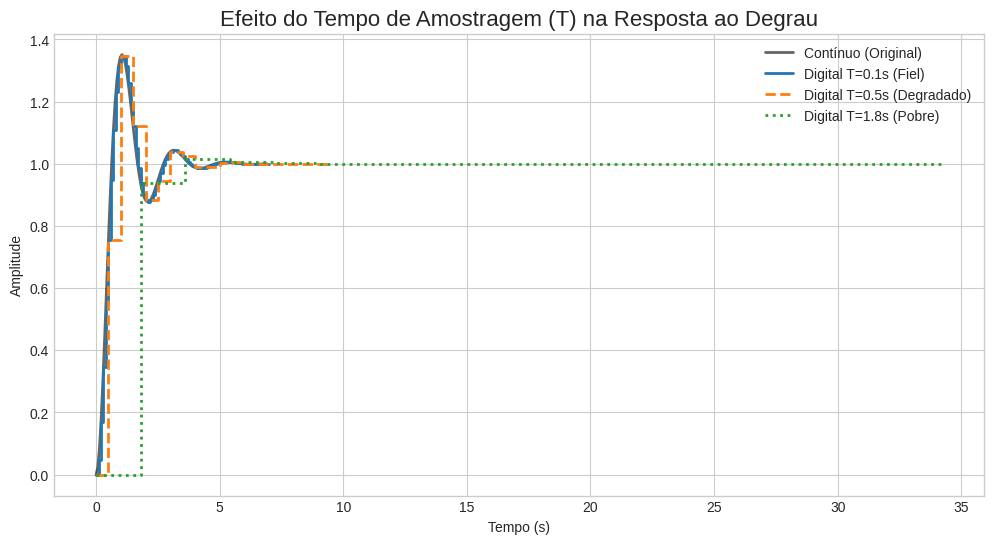


ANÁLISE:
1. T=0.1s: A resposta digital segue de perto a contínua. O sistema captura a dinâmica rápida.
2. T=0.5s: A resposta é mais 'quadrada' e perde detalhes dos picos. O atraso de fase aumenta.
3. T=1.8s: A amostragem é tão lenta que perde completamente a oscilação natural do sistema.
   IMPORTANTE: Em malha fechada, esse atraso excessivo (phase lag) causado pelo ZOH causaria instabilidade!


In [2]:
# --- Bloco de Código 1: Discretização e Efeito do Tempo de Amostragem ---

print("--- Simulação: Impacto da Amostragem na Estabilidade ---")

# 1. Sistema Contínuo Original (2ª Ordem, Estável)
# G(s) = 10 / (s^2 + 2s + 10)  -> omega_n = sqrt(10), zeta = 1/sqrt(10) approx 0.316
num = [10]
den = [1, 2, 10]
sys_cont = ct.tf(num, den)

# 2. Discretização com diferentes Tempos de Amostragem (T)
# T1: Rápido (Bom)
# T2: Lento (Ruim - Perda de fidelidade)
# T3: Muito Lento (Crítico - Risco de Instabilidade em malha fechada)
T_rapido = 0.1
T_lento = 0.5
T_critico = 1.8

# Método ZOH (Zero-Order Hold) é o padrão para DACs (Digital-to-Analog Converters)
sys_d_rapido = ct.c2d(sys_cont, T_rapido, method='zoh')
sys_d_lento  = ct.c2d(sys_cont, T_lento, method='zoh')
sys_d_critico = ct.c2d(sys_cont, T_critico, method='zoh')

# 3. Simulação da Resposta ao Degrau (Malha Aberta)
# Nota: A simulação discreta retorna pontos apenas nos instantes kT
t_cont, y_cont = ct.step_response(sys_cont)
t_d1, y_d1 = ct.step_response(sys_d_rapido)
t_d2, y_d2 = ct.step_response(sys_d_lento)
t_d3, y_d3 = ct.step_response(sys_d_critico)

# --- Plotagem ---
plt.figure(figsize=(12, 6))

# Sistema Contínuo (Referência)
plt.plot(t_cont, y_cont, 'k-', linewidth=2, label='Contínuo (Original)', alpha=0.6)

# Sistemas Discretos (Step plot para enfatizar o comportamento digital)
plt.step(t_d1, y_d1, where='post', label=f'Digital T={T_rapido}s (Fiel)', linewidth=2)
plt.step(t_d2, y_d2, where='post', label=f'Digital T={T_lento}s (Degradado)', linewidth=2, linestyle='--')
plt.step(t_d3, y_d3, where='post', label=f'Digital T={T_critico}s (Pobre)', linewidth=2, linestyle=':')

plt.title('Efeito do Tempo de Amostragem (T) na Resposta ao Degrau', fontsize=16)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print("\nANÁLISE:")
print(f"1. T={T_rapido}s: A resposta digital segue de perto a contínua. O sistema captura a dinâmica rápida.")
print(f"2. T={T_lento}s: A resposta é mais 'quadrada' e perde detalhes dos picos. O atraso de fase aumenta.")
print(f"3. T={T_critico}s: A amostragem é tão lenta que perde completamente a oscilação natural do sistema.")
print("   IMPORTANTE: Em malha fechada, esse atraso excessivo (phase lag) causado pelo ZOH causaria instabilidade!")


--- Simulação: Lugar das Raízes no Plano-z ---


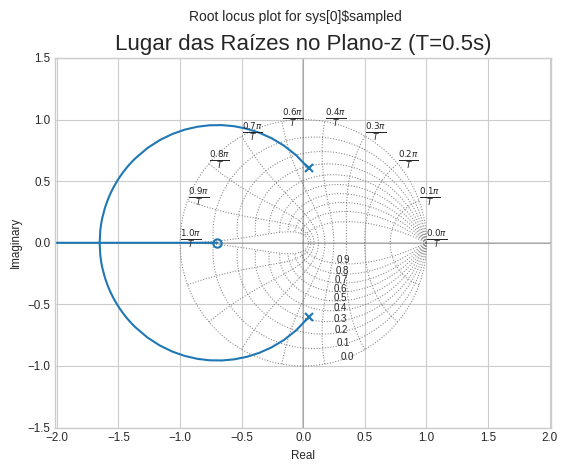


ANÁLISE DO PLANO-Z:
- O círculo de raio 1 representa o limite de estabilidade.
- Polos DENTRO do círculo = Estável.
- Polos FORA do círculo = Instável.
- Observe que, para ganhos (K) muito altos, os ramos do lugar das raízes saem do círculo.
  Isso confirma que aumentar muito o ganho em um sistema digital pode levar à instabilidade,
  assim como no contínuo, mas a região segura é restrita ao círculo.


In [5]:
# --- Bloco de Código 2: Estabilidade em Malha Fechada no Plano-z ---

print("\n--- Simulação: Lugar das Raízes no Plano-z ---")

# Vamos analisar o sistema "Lento" (T=0.5s) em malha fechada.
# A estabilidade agora depende de os polos estarem DENTRO do círculo unitário.

plt.figure()

# Plota o Lugar das Raízes para o sistema discreto
# O python-control desenha automaticamente o Círculo Unitário (limite de estabilidade)
ct.root_locus(sys_d_lento, grid=True)

plt.title(f'Lugar das Raízes no Plano-z (T={T_lento}s)', fontsize=16)
# Ajuste de limites para ver bem o círculo unitário
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()

print("\nANÁLISE DO PLANO-Z:")
print("- O círculo de raio 1 representa o limite de estabilidade.")
print("- Polos DENTRO do círculo = Estável.")
print("- Polos FORA do círculo = Instável.")
print("- Observe que, para ganhos (K) muito altos, os ramos do lugar das raízes saem do círculo.")
print("  Isso confirma que aumentar muito o ganho em um sistema digital pode levar à instabilidade,")
print("  assim como no contínuo, mas a região segura é restrita ao círculo.")